In [1]:
import math
import CoolProp
from CoolProp.CoolProp import PropsSI
import numpy as np
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

In [2]:
#Índice de refração dos materiais
nar=1
nagua=1.33
nvidro=1.526
#Coeficiente de extinção luminosa do vidro [1/m]
Kextinvidro=7
#Temperatura ambiente
Tambiente=293.15
#Pressão atmosférica [Pa]
Patm=101325
#Temperatura do ponto de orvalho [°C]
Tpontodeorvalho=16.3
#Temperatura de referência para a eficiência do painel [K]
Tref=298.15
#Irradiação de referência para a eficiência do painel [W/m²]
Gref=1000 
Effref=0.204
#Aceleração da gravidade [m/s²]
Gravidade=9.80665                     
#Constante de Stefan–Boltzmann [W/m²K^4]
ConstStefanBoltzmann=5.670*(10**(-8))  
#Largura do módulo [m]
Largura=1.048
#Comprimento do módulo [m]
Comprimento=2.108
#Áreas de superfície (A) [m²]     
AreaSuperficiePainel=(Largura*Comprimento)
#Largura da estrutura na superfície do painel [m]
Larguraestrutura=0.011
#Área ocupada pelo vidro[m²]
Areasuperficievidro=(Largura-(2*Larguraestrutura))*(Comprimento-(2*Larguraestrutura))
#Área ocupada pela estrutura [m²]
AreaSuperficieEstrutura=AreaSuperficiePainel-((Largura-(2*Larguraestrutura))*(Comprimento-(2*Larguraestrutura)))
#Largura da célula de [m]
LarguraCelula=0.166
#Comprimento da célula [m]
ComprimentoCelula=0.083
#Área ocupada por célula [m²]
AreaCelula=LarguraCelula*ComprimentoCelula
#Quantidade de células
QuantidadeCelulas=144
#Área de superfície do backsheet [m²]
AreaSuperficieBacksheet=Areasuperficievidro-(AreaCelula*QuantidadeCelulas)
#Porção da luz refletida no backsheet recuperada pelas células
Parcelaluzrecuperadabacksheet=0.46
#Porção da luz refletida na superfície das células
Luzrefletidacelula=0.052
#Perímetro do vidro [m]
Perimetrovidro=(2*(Largura-(2*Larguraestrutura)))+(2*(Comprimento-(2*Larguraestrutura)))
#Comprimento característico da geometria para cálculo da convecção natural em placas horizontais (Lc) [m]
Lc=Areasuperficievidro/Perimetrovidro
#Espessuras de componentes (L) [m]
EspVidro=0.0032               
EspEVAsup=0.0005
EspRevestimentoantirreflexo=0.0000001
EspSiliciosup=0.0002
EspSilicioinf=0.0002
EspEVAinf=0.0005
EspBacksheet=0.0001
#Emissividade dos materiais (ε)
εVidro=0.925                        
εAgua=0.96                 
εBacksheet=0.900                        
εSolo=0.95                      
#Emissividade combinada entre a superficie inferior do painel e o chão
εCombinadaBacksheetSolo=(1/((1/εBacksheet)+(1/εSolo)-1))
εCombinadaBacksheetAgua=(1/((1/εBacksheet)+(1/εAgua)-1))
εCombinadaVidroAgua=(1/((1/εVidro)+(1/εAgua)-1))
#Condutividade térmica dos materiais (k) [W/m.K]
kVidro=0.937
KEVA=0.23                  
KRevestimentoantirreflexo=1.38
KSilicio=148
KBacksheet=0.36
#Velocidade do ar (vento) [m/s]
Velocidadear=1  

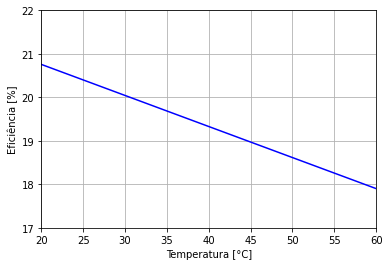

In [3]:
eficienciagrafico=[]
testeeficienciaTemperatura=[intervalo for intervalo in np.arange(20,61,1)]
def graficoeficiencia(Tcentrocelula):
    eficiencia=100*Effref*(1-(0.0035*(Tcentrocelula-25)))
    return eficiencia
for Tcentrocelula in testeeficienciaTemperatura:
    eficienciagrafico.append(graficoeficiencia(Tcentrocelula))
plt.plot (testeeficienciaTemperatura,eficienciagrafico,color = 'blue')
plt.xlim (20,60)
plt.ylim (17,22)
plt.xlabel("Temperatura [°C]")
plt.ylabel("Eficiência [%]")
plt.grid()
plt.savefig('testeeficiencia.png', dpi=600, bbox_inches='tight')
plt.show()

In [4]:
diasano=list(range(1,366))
intervalosdia=list(range(0,1440,10))
irraddia=[]
irradano=[]
matrizirradiacao=[]
def anguloincidencia(n,BRT):
    #Ângulo da latitude
    l=-20.66947088021501
    longitude=-46.31785739509408
    B=((n-1)*360)/365
    E=229.2*(0.000075+(0.001868*math.cos(math.radians(B)))-(0.032077*math.sin(math.radians(B)))-(0.014615*math.cos(math.radians(2*B)))-(0.04089*math.sin(math.radians(2*B))))
    correcaolongitude=45+longitude
    tempocorrecaolongitude=correcaolongitude*(60/15)
    LCT=BRT+tempocorrecaolongitude
    LST=LCT+E
    h=(LST-720)*(15/60)
    d=23.45*math.sin(math.radians((360*(284+n))/365))
    beta=math.degrees(math.asin((math.cos(math.radians(l))*math.cos(math.radians(h))*math.cos(math.radians(d)))+(math.sin(math.radians(l))*math.sin(math.radians(d)))))
    if beta<=0.1:
        beta=0
        theta=90
        return theta
    theta=math.degrees(math.acos(math.sin(math.radians(beta))))
    return theta
angulo=[]
matrizanguloincidencia=[]
for n in diasano:
    for BRT in intervalosdia:
        angulo.append(anguloincidencia(n,BRT))
anguloanual=np.array_split(angulo,365)
for array in anguloanual:
    matrizanguloincidencia.append(list(array))
def irradiacao(n,BRT):
    #Ângulo da latitude
    l=-20.67028263515713
    longitude=-46.31694998953157
    B=((n-1)*360)/365
    E=229.2*(0.000075+(0.001868*math.cos(math.radians(B)))-(0.032077*math.sin(math.radians(B)))-(0.014615*math.cos(math.radians(2*B)))-(0.04089*math.sin(math.radians(2*B))))
    correcaolongitude=45+longitude
    tempocorrecaolongitude=correcaolongitude*(60/15)
    LCT=BRT+tempocorrecaolongitude
    LST=LCT+E
    h=(LST-720)*(15/60)
    d=23.45*math.sin(math.radians((360*(284+n))/365))
    beta=math.degrees(math.asin((math.cos(math.radians(l))*math.cos(math.radians(h))*math.cos(math.radians(d)))+(math.sin(math.radians(l))*math.sin(math.radians(d)))))
    if beta<=0.1:
        beta=0
        G=0
        return G
    theta=math.degrees(math.acos(math.sin(math.radians(beta))))
    if n<22 and n>0:
        ns=n-0
        A=1233+(((ns-0+10)/31)*(1230-1233))
        B=0.142+(((ns-0+10)/31)*(0.142-0.142))
        C=0.057+(((ns-0+10)/31)*(0.058-0.057))
    if n>21 and n<53:
        A=1230+(((n-21)/31)*(1215-1230))
        B=0.142+(((n-21)/31)*(0.144-0.142))
        C=0.058+(((n-21)/31)*(0.060-0.058))
    if n>52 and n<81:
        A=1215+(((n-52)/28)*(1186-1215))
        B=0.144+(((n-52)/28)*(0.156-0.144))
        C=0.060+(((n-52)/28)*(0.071-0.060))
    if n>80 and n<112:
        A=1186+(((n-80)/31)*(1136-1186))
        B=0.156+(((n-80)/31)*(0.180-0.156))
        C=0.071+(((n-80)/31)*(0.097-0.071))
    if n>111 and n<142:
        A=1136+(((n-111)/30)*(1104-1136))
        B=0.180+(((n-111)/30)*(0.196-0.180))
        C=0.097+(((n-111)/30)*(0.121-0.097))
    if n>141 and n<173:
        A=1104+(((n-141)/31)*(1088-1104))
        B=0.196+(((n-141)/31)*(0.205-0.196))
        C=0.121+(((n-141)/31)*(0.134-0.121))    
    if n>172 and n<203:
        A=1088+(((n-172)/30)*(1085-1088))
        B=0.205+(((n-172)/30)*(0.207-0.205))
        C=0.134+(((n-172)/30)*(0.136-0.134))
    if n>202 and n<234:
        A=1085+(((n-202)/31)*(1107-1085))
        B=0.207+(((n-202)/31)*(0.201-0.207))
        C=0.136+(((n-202)/31)*(0.122-0.136))
    if n>233 and n<265:
        A=1107+(((n-233)/31)*(1151-1107))
        B=0.201+(((n-233)/31)*(0.177-0.201))
        C=0.122+(((n-233)/31)*(0.092-0.122))
    if n>264 and n<295:
        A=1151+(((n-264)/30)*(1192-1151))
        B=0.177+(((n-264)/30)*(0.160-0.177))
        C=0.092+(((n-264)/30)*(0.073-0.092))
    if n>294 and n<326:
        A=1192+(((n-294)/31)*(1221-1192))
        B=0.160+(((n-294)/31)*(0.149-0.160))
        C=0.073+(((n-294)/31)*(0.063-0.073))
    if n>325 and n<356:
        A=1221+(((n-325)/30)*(1233-1221))
        B=0.149+(((n-325)/30)*(0.142-0.149))
        C=0.063+(((n-325)/30)*(0.057-0.063))
    if n>355 and n<366:
        A=1233+(((n-355)/31)*(1230-1233))
        B=0.142+(((n-355)/31)*(0.142-0.142))
        C=0.057+(((n-355)/31)*(0.058-0.057))
    Gnd=A/math.exp(B/math.sin(math.radians(beta)))
    GD=Gnd*math.cos(math.radians(theta))
    Gd=C*Gnd
    G=GD+Gd
    if G<0:
        G=0
    return G
for n in diasano:
    for BRT in intervalosdia:
        irraddia.append(irradiacao(n,BRT))
irradano=np.array_split(irraddia,365)
for array in irradano:
    matrizirradiacao.append(list(array))

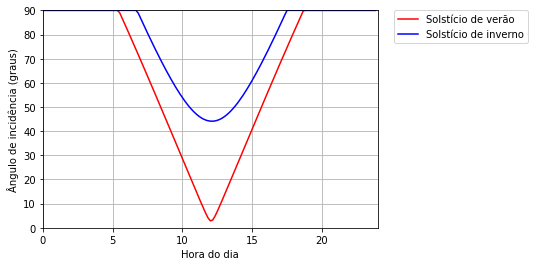

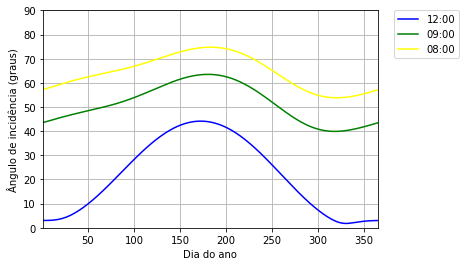

In [5]:
diaemhoras=[]
for number in intervalosdia:
    diaemhoras.append(number/60)
solsticioverao=matrizanguloincidencia[354]
solsticioinverno=matrizanguloincidencia[172]
plt.plot (diaemhoras,solsticioverao,color = 'red', label='Solstício de verão')
plt.plot (diaemhoras,solsticioinverno,color = 'blue', label='Solstício de inverno')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim (0,24)
plt.ylim (0,90) 
plt.xlabel("Hora do dia")
plt.ylabel("Ângulo de incidência (graus)")
plt.grid()
plt.savefig('graficoangulo1.png', dpi=600, bbox_inches='tight')
plt.show()
meiodia=72
novehoras=54
oitohoras=48
incidenciameiodia=[sub[meiodia] for sub in matrizanguloincidencia]
incidencianove=[sub[novehoras] for sub in matrizanguloincidencia]
incidenciaoito=[sub[oitohoras] for sub in matrizanguloincidencia]
plt.plot (diasano,incidenciameiodia,color = 'blue', label='12:00')
plt.plot (diasano,incidencianove,color = 'green', label='09:00')
plt.plot (diasano,incidenciaoito,color = 'yellow', label='08:00')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim (1,365)
plt.ylim (0,90) 
plt.xlabel("Dia do ano")
plt.ylabel("Ângulo de incidência (graus)")
plt.grid()
plt.savefig('graficoangulo2.png', dpi=600, bbox_inches='tight')
plt.show()

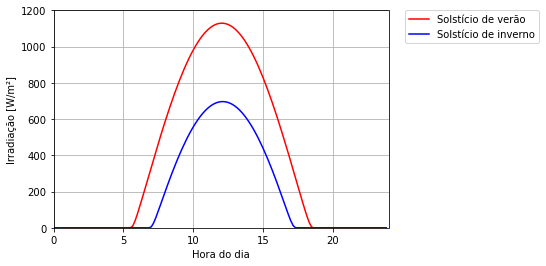

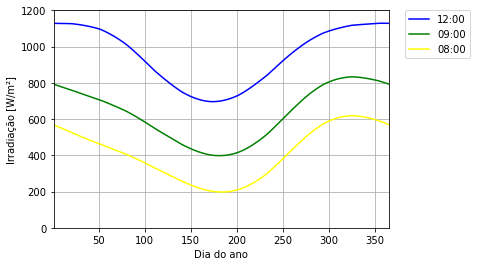

In [6]:
diaemhoras=[]
for number in intervalosdia:
    diaemhoras.append(number/60)
solsticioverao=matrizirradiacao[354]
solsticioinverno=matrizirradiacao[172]
plt.plot (diaemhoras,solsticioverao,color = 'red', label='Solstício de verão')
plt.plot (diaemhoras,solsticioinverno,color = 'blue', label='Solstício de inverno')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim (0,24)
plt.ylim (0,1200) 
plt.xlabel("Hora do dia")
plt.ylabel("Irradiação [W/m²]")
plt.grid()
plt.savefig('graficoirrad1.png', dpi=600, bbox_inches='tight')
plt.show()
meiodia=72
novehoras=54
oitohoras=48
irradiacaomeiodia=[sub[meiodia] for sub in matrizirradiacao]
irradiacaonove=[sub[novehoras] for sub in matrizirradiacao]
irradiacaooito=[sub[oitohoras] for sub in matrizirradiacao]
plt.plot (diasano,irradiacaomeiodia,color = 'blue', label='12:00')
plt.plot (diasano,irradiacaonove,color = 'green', label='09:00')
plt.plot (diasano,irradiacaooito,color = 'yellow', label='08:00')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim (1,365)
plt.ylim (0,1200) 
plt.xlabel("Dia do ano")
plt.ylabel("Irradiação [W/m²]")
plt.grid()
plt.savefig('graficoirrad2.png', dpi=600, bbox_inches='tight')
plt.show()

In [7]:
print('No solstício de verão, há irradiação máxima de',"%.2f" % max(matrizirradiacao[354]),'W/m²')
print('No solstício de inverno, há irradiação máxima de',"%.2f" % max(matrizirradiacao[172]),'W/m²')
print('Às 6:00 horas do solstício de verão, há irradiação solar de',"%.2f" % matrizirradiacao[354][36],'W/m² e o ângulo de incidência é',"%.2f" % matrizanguloincidencia[354][36],'°')
print('Às 12:00 horas do solstício de verão, há irradiação solar de',"%.2f" % matrizirradiacao[354][72],'W/m² e o ângulo de incidência é',"%.2f" % matrizanguloincidencia[354][72],'°')
print('Às 15:00 horas do solstício de verão, há irradiação solar de',"%.2f" % matrizirradiacao[354][90],'W/m² e o ângulo de incidência é',"%.2f" % matrizanguloincidencia[354][90],'°')
print('Às 17:00 horas do solstício de verão, há irradiação solar de',"%.2f" % matrizirradiacao[354][102],'W/m² e o ângulo de incidência é',"%.2f" % matrizanguloincidencia[354][102],'°')

No solstício de verão, há irradiação máxima de 1129.21 W/m²
No solstício de inverno, há irradiação máxima de 696.47 W/m²
Às 6:00 horas do solstício de verão, há irradiação solar de 76.16 W/m² e o ângulo de incidência é 82.60 °
Às 12:00 horas do solstício de verão, há irradiação solar de 1129.21 W/m² e o ângulo de incidência é 2.87 °
Às 15:00 horas do solstício de verão, há irradiação solar de 830.22 W/m² e o ângulo de incidência é 40.93 °
Às 17:00 horas do solstício de verão, há irradiação solar de 363.29 W/m² e o ângulo de incidência é 68.05 °


In [8]:
#Resistência térmica dos componentes (R) [K/W]
RmeiaespessuraVidro=EspVidro/(2*kVidro*Areasuperficievidro)
REVAsup=EspEVAsup/(KEVA*Areasuperficievidro)
RRevestimentoantirreflexo=EspRevestimentoantirreflexo/(KRevestimentoantirreflexo*Areasuperficievidro)
RSiliciosup=EspSiliciosup/(KSilicio*Areasuperficievidro)
RSilicioinf=EspSilicioinf/(KSilicio*Areasuperficievidro)
REVAinf=EspEVAinf/(KEVA*Areasuperficievidro)
RBacksheet=EspBacksheet/(KBacksheet*Areasuperficievidro)
#Combinações de resistências (R) [K/W]
RConducaocelulacentrovidro=RSiliciosup+RRevestimentoantirreflexo+REVAsup+RmeiaespessuraVidro
RConducaocelulasuperficieinferior=RSilicioinf+REVAinf+RBacksheet
RConducaocentrovidrosuperficiesuperior=RmeiaespessuraVidro

In [9]:
avidroref=math.exp(-Kextinvidro*EspVidro)
rvidroref=((nar-nvidro)/(nar+nvidro))**2
Luzatingindodiretamentecelulasref=(Gref*avidroref*(1-rvidroref))*AreaCelula*QuantidadeCelulas #equivalente à luz absorvida pela célula somada à luz refletida
Luzrecuperadobacksheetref=(Gref*avidroref*(1-rvidroref))*AreaSuperficieBacksheet*Parcelaluzrecuperadabacksheet
Eficienciareferenciacelulas=Effref*AreaSuperficiePainel*Gref/(Luzatingindodiretamentecelulasref+Luzrecuperadobacksheetref)

In [10]:
def reflexaoaguaevidro(thetaar):
    thetaagua=math.degrees(math.asin((nar/nagua)*math.sin(math.radians(thetaar))))
    if thetaagua==0:
        ragua=((nar-nagua)/(nar+nagua))**2
    if thetaagua!=0:
        ragua=(1/2)*(((math.sin(math.radians(thetaar-thetaagua))**2)/(math.sin(math.radians(thetaar+thetaagua))**2)) + ((math.tan(math.radians(thetaar-thetaagua))**2)/(math.tan(math.radians(thetaar+thetaagua))**2)))
    Tagua=1*(1-ragua)
    thetavidro=math.degrees(math.asin((nagua/nvidro)*math.sin(math.radians(thetaagua))))
    if thetavidro==0:
        rvidro=((nagua-nvidro)/(nagua+nvidro))**2
    if thetavidro!=0:
        rvidro=(1/2)*(((math.sin(math.radians(thetaagua-thetavidro))**2)/(math.sin(math.radians(thetaagua+thetavidro))**2)) + ((math.tan(math.radians(thetaagua-thetavidro))**2)/(math.tan(math.radians(thetaagua+thetavidro))**2)))
    T=Tagua*(1-rvidro)
    reflexaoaguaevidro=1-T
    return reflexaoaguaevidro
def reflexaoar(thetaar):
    thetavidro=math.degrees(math.asin((nar/nvidro)*math.sin(math.radians(thetaar))))
    if thetavidro==0:
        rvidro=((nar-nvidro)/(nar+nvidro))**2
    if thetavidro!=0:
        rvidro=(1/2)*(((math.sin(math.radians(thetaar-thetavidro))**2)/(math.sin(math.radians(thetaar+thetavidro))**2)) + ((math.tan(math.radians(thetaar-thetavidro))**2)/(math.tan(math.radians(thetaar+thetavidro))**2)))
    return rvidro
print('A um ângulo de incidência de 0°, a reflexão entre o ar e a água somada à reflexão entre a água e o vidro é de ',"%.2f" % (reflexaoaguaevidro(0)*100),'%')
print('A um ângulo de incidência de 0°, a reflexão entre o ar e o vidro é de ',"%.2f" % (reflexaoar(0)*100),'%')
print('A um ângulo de incidência de 45°, a reflexão entre o ar e a água somada à reflexão entre a água e o vidro é de ',"%.2f" % (reflexaoaguaevidro(45)*100),'%')
print('A um ângulo de incidência de 45°, a reflexão entre o ar e o vidro é de ',"%.2f" % (reflexaoar(45)*100),'%')

A um ângulo de incidência de 0°, a reflexão entre o ar e a água somada à reflexão entre a água e o vidro é de  2.47 %
A um ângulo de incidência de 0°, a reflexão entre o ar e o vidro é de  4.34 %
A um ângulo de incidência de 45°, a reflexão entre o ar e a água somada à reflexão entre a água e o vidro é de  3.26 %
A um ângulo de incidência de 45°, a reflexão entre o ar e o vidro é de  5.39 %


In [22]:
#cálculo da troca termica com ar em ambas superfícies
def analisemodulo(Gar,thetaar,t):
    erro=1
    if Gar<=0:
        Energiagerada=0
        return Energiagerada
    if thetaar>=90:
        Energiagerada=0
        return Energiagerada
    Tsuperficiesuperior=330
    thetavidro=math.degrees(math.asin((nar/nvidro)*math.sin(math.radians(thetaar))))
    if thetavidro==0:
        rvidro=((nar-nvidro)/(nar+nvidro))**2
    if thetavidro!=0:
        rvidro=(1/2)*(((math.sin(math.radians(thetaar-thetavidro))**2)/(math.sin(math.radians(thetaar+thetavidro))**2)) + ((math.tan(math.radians(thetaar-thetavidro))**2)/(math.tan(math.radians(thetaar+thetavidro))**2)))
    if thetavidro==0:
        tglinhavidro=EspVidro
    if thetavidro!=0:
        tglinhavidro=EspVidro/math.cos(math.radians(thetavidro))
    avidro=math.exp(-Kextinvidro*tglinhavidro)
    Luzsolar=Gar*AreaSuperficiePainel
    Luzrefletidavidro=rvidro*Gar*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Luzperdidaestrutura=Gar*AreaSuperficieEstrutura
    Luzatingindodiretamentecelulas=(Gar*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas
    Luzrefletidacelulas=(Gar*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas*Luzrefletidacelula
    Luzperdidabacksheet=(Gar*avidro*(1-rvidro))*AreaSuperficieBacksheet*(1-Parcelaluzrecuperadabacksheet)
    Luzrecuperadobacksheet=(Gar*avidro*(1-rvidro))*AreaSuperficieBacksheet*Parcelaluzrecuperadabacksheet
    Qabsorvidovidro=(1-avidro)*Gar*(1-rvidro)*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Tceu=Tambiente*((0.711+(0.0056*Tpontodeorvalho)+(0.000073*(Tpontodeorvalho**2))+(0.013*math.cos(15*t)))**(1/4))
    while abs(erro)>0.01:
        Tsuperficiesuperior=Tsuperficiesuperior-(erro*0.2)
        Tfilmesup=(Tsuperficiesuperior+Tambiente)/2
        Prandtlsup=PropsSI('Prandtl','P',Patm,'T',Tfilmesup,'air')
        KArsup=PropsSI('L','P',Patm,'T',Tfilmesup,'air')
        Reynoldssup=(PropsSI('D','P',Patm,'T',Tfilmesup,'air')*Velocidadear*(Largura-(2*Larguraestrutura)))/PropsSI('V','P',Patm,'T',Tfilmesup,'air')
        Nusseltsup=0.302*(Reynoldssup**(1/2))*(Prandtlsup**(1/3))
        hconvsup=3*Nusseltsup*KArsup/(Largura-(2*Larguraestrutura))
        hradsup=εVidro*ConstStefanBoltzmann*(Tsuperficiesuperior+Tceu)*((Tsuperficiesuperior**2)+(Tceu**2))
        Qsuperficiesuperior=Areasuperficievidro*((hconvsup*(Tsuperficiesuperior-Tambiente))+(hradsup*(Tsuperficiesuperior-Tceu)))
        Tcentrovidro=Tsuperficiesuperior+(Qsuperficiesuperior*RConducaocentrovidrosuperficiesuperior)
        Qcelulassuperior=Qsuperficiesuperior-Qabsorvidovidro
        Tcentrocelula=Tcentrovidro+(Qcelulassuperior*RConducaocelulacentrovidro)
        Energiagerada=Luzsolar*Effref*(1-((Tcentrocelula-Tref)*0.0035))
        Qtotalcelula=Luzatingindodiretamentecelulas+Luzrecuperadobacksheet-Energiagerada-Luzrefletidacelulas
        Qcelulainferior=Qtotalcelula-Qcelulassuperior
        Tsuperficieinferior=Tcentrocelula-(Qcelulainferior*RConducaocelulasuperficieinferior)
        Tfilmeinf=(Tsuperficieinferior+Tambiente)/2
        Prandtlinf=PropsSI('Prandtl','P',Patm,'T',Tfilmeinf,'air')
        Reynoldsinf=(PropsSI('D','P',Patm,'T',Tfilmeinf,'air')*Velocidadear*(Largura-(2*Larguraestrutura)))/PropsSI('V','P',Patm,'T',Tfilmeinf,'air')
        Nusseltinf=0.302*(Reynoldsinf**(1/2))*(Prandtlinf**(1/3))
        KArinf=PropsSI('L','P',Patm,'T',Tfilmeinf,'air')
        hconvinf=3*Nusseltinf*KArinf/(Largura-(2*Larguraestrutura))
        hradinf=εCombinadaBacksheetSolo*ConstStefanBoltzmann*(Tsuperficieinferior+Tambiente)*((Tsuperficieinferior**2)+(Tambiente**2))
        Tambientecalculada=Tsuperficieinferior-(Qcelulainferior/((hconvinf+hradinf)*Areasuperficievidro))
        erro=Tambientecalculada-Tambiente
    return Energiagerada

In [23]:
# cálculo da troca termica com ar em ambas superfícies, considerando a luz que atinge as células
def analisecelula(Gar,thetaar,t):
    erro=1
    if Gar<=0:
        Energiagerada=0
        return Energiagerada
    if thetaar>=90:
        Energiagerada=0
        return Energiagerada
    Tsuperficiesuperior=330
    thetavidro=math.degrees(math.asin((nar/nvidro)*math.sin(math.radians(thetaar))))
    if thetavidro==0:
        rvidro=((nar-nvidro)/(nar+nvidro))**2
    if thetavidro!=0:
        rvidro=(1/2)*(((math.sin(math.radians(thetaar-thetavidro))**2)/(math.sin(math.radians(thetaar+thetavidro))**2)) + ((math.tan(math.radians(thetaar-thetavidro))**2)/(math.tan(math.radians(thetaar+thetavidro))**2)))
    if thetavidro==0:
        tglinhavidro=EspVidro
    if thetavidro!=0:
        tglinhavidro=EspVidro/math.cos(math.radians(thetavidro))
    avidro=math.exp(-Kextinvidro*tglinhavidro)
    Luzsolar=Gar*AreaSuperficiePainel
    Luzrefletidavidro=rvidro*Gar*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Luzperdidaestrutura=Gar*AreaSuperficieEstrutura
    Luzatingindodiretamentecelulas=(Gar*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas
    Luzrefletidacelulas=(Gar*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas*Luzrefletidacelula
    Luzperdidabacksheet=(Gar*avidro*(1-rvidro))*AreaSuperficieBacksheet*(1-Parcelaluzrecuperadabacksheet)
    Luzrecuperadobacksheet=(Gar*avidro*(1-rvidro))*AreaSuperficieBacksheet*Parcelaluzrecuperadabacksheet
    Qabsorvidovidro=(1-avidro)*Gar*(1-rvidro)*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Tceu=Tambiente*((0.711+(0.0056*Tpontodeorvalho)+(0.000073*(Tpontodeorvalho**2))+(0.013*math.cos(15*t)))**(1/4))
    while abs(erro)>0.01:
        Tsuperficiesuperior=Tsuperficiesuperior-(erro*0.2)
        Tfilmesup=(Tsuperficiesuperior+Tambiente)/2
        Prandtlsup=PropsSI('Prandtl','P',Patm,'T',Tfilmesup,'air')
        KArsup=PropsSI('L','P',Patm,'T',Tfilmesup,'air')
        Reynoldssup=(PropsSI('D','P',Patm,'T',Tfilmesup,'air')*Velocidadear*(Largura-(2*Larguraestrutura)))/PropsSI('V','P',Patm,'T',Tfilmesup,'air')
        Nusseltsup=0.302*(Reynoldssup**(1/2))*(Prandtlsup**(1/3))
        hconvsup=3*Nusseltsup*KArsup/(Largura-(2*Larguraestrutura))
        hradsup=εVidro*ConstStefanBoltzmann*(Tsuperficiesuperior+Tceu)*((Tsuperficiesuperior**2)+(Tceu**2))
        Qsuperficiesuperior=Areasuperficievidro*((hconvsup*(Tsuperficiesuperior-Tambiente))+(hradsup*(Tsuperficiesuperior-Tceu)))
        Tcentrovidro=Tsuperficiesuperior+(Qsuperficiesuperior*RConducaocentrovidrosuperficiesuperior)
        Qcelulassuperior=Qsuperficiesuperior-Qabsorvidovidro
        Tcentrocelula=Tcentrovidro+(Qcelulassuperior*RConducaocelulacentrovidro)
        Energiagerada=Eficienciareferenciacelulas*(Luzatingindodiretamentecelulas+Luzrecuperadobacksheet)*(1-((Tcentrocelula-Tref)*0.0035))
        Qtotalcelula=Luzatingindodiretamentecelulas+Luzrecuperadobacksheet-Energiagerada-Luzrefletidacelulas
        Qcelulainferior=Qtotalcelula-Qcelulassuperior
        Tsuperficieinferior=Tcentrocelula-(Qcelulainferior*RConducaocelulasuperficieinferior)
        Tfilmeinf=(Tsuperficieinferior+Tambiente)/2
        Prandtlinf=PropsSI('Prandtl','P',Patm,'T',Tfilmeinf,'air')
        Reynoldsinf=(PropsSI('D','P',Patm,'T',Tfilmeinf,'air')*Velocidadear*(Largura-(2*Larguraestrutura)))/PropsSI('V','P',Patm,'T',Tfilmeinf,'air')
        Nusseltinf=0.302*(Reynoldsinf**(1/2))*(Prandtlinf**(1/3))
        KArinf=PropsSI('L','P',Patm,'T',Tfilmeinf,'air')
        hconvinf=3*Nusseltinf*KArinf/(Largura-(2*Larguraestrutura))
        hradinf=εCombinadaBacksheetSolo*ConstStefanBoltzmann*(Tsuperficieinferior+Tambiente)*((Tsuperficieinferior**2)+(Tambiente**2))
        Tambientecalculada=Tsuperficieinferior-(Qcelulainferior/((hconvinf+hradinf)*Areasuperficievidro))
        erro=Tambientecalculada-Tambiente
    return Energiagerada

In [24]:
#cálculo da troca termica com água na superfície inferior, considerando a luz que atinge as células
def analisemisto(Gar,thetaar,t):
    erro=1
    if Gar<=0:
        Energiagerada=0
        Tcentrocelula=Tambiente
        return Energiagerada
    if thetaar>=90:
        Energiagerada=0
        return Energiagerada
    Tsuperficiesuperior=330
    thetavidro=math.degrees(math.asin((nar/nvidro)*math.sin(math.radians(thetaar))))
    if thetavidro==0:
        rvidro=((nar-nvidro)/(nar+nvidro))**2
    if thetavidro!=0:
        rvidro=(1/2)*(((math.sin(math.radians(thetaar-thetavidro))**2)/(math.sin(math.radians(thetaar+thetavidro))**2)) + ((math.tan(math.radians(thetaar-thetavidro))**2)/(math.tan(math.radians(thetaar+thetavidro))**2)))
    if thetavidro==0:
        tglinhavidro=EspVidro
    if thetavidro!=0:
        tglinhavidro=EspVidro/math.cos(math.radians(thetavidro))
    avidro=math.exp(-Kextinvidro*tglinhavidro)
    Luzsolar=Gar*AreaSuperficiePainel
    Luzrefletidavidro=rvidro*Gar*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Luzperdidaestrutura=Gar*AreaSuperficieEstrutura
    Luzatingindodiretamentecelulas=(Gar*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas
    Luzrefletidacelulas=(Gar*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas*Luzrefletidacelula
    Luzperdidabacksheet=(Gar*avidro*(1-rvidro))*AreaSuperficieBacksheet*(1-Parcelaluzrecuperadabacksheet)
    Luzrecuperadobacksheet=(Gar*avidro*(1-rvidro))*AreaSuperficieBacksheet*Parcelaluzrecuperadabacksheet
    Qabsorvidovidro=(1-avidro)*Gar*(1-rvidro)*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Tceu=Tambiente*((0.711+(0.0056*Tpontodeorvalho)+(0.000073*(Tpontodeorvalho**2))+(0.013*math.cos(15*t)))**(1/4))
    while abs(erro)>0.01:
        Tsuperficiesuperior=Tsuperficiesuperior-(erro*0.2)
        Tfilmesup=(Tsuperficiesuperior+Tambiente)/2
        Prandtlsup=PropsSI('Prandtl','P',Patm,'T',Tfilmesup,'air')
        KArsup=PropsSI('L','P',Patm,'T',Tfilmesup,'air')
        Reynoldssup=(PropsSI('D','P',Patm,'T',Tfilmesup,'air')*Velocidadear*(Largura-(2*Larguraestrutura)))/PropsSI('V','P',Patm,'T',Tfilmesup,'air')
        Nusseltsup=0.302*(Reynoldssup**(1/2))*(Prandtlsup**(1/3))
        hconvsup=3*Nusseltsup*KArsup/(Largura-(2*Larguraestrutura))
        hradsup=εVidro*ConstStefanBoltzmann*(Tsuperficiesuperior+Tceu)*((Tsuperficiesuperior**2)+(Tceu**2))
        Qsuperficiesuperior=Areasuperficievidro*((hconvsup*(Tsuperficiesuperior-Tambiente))+(hradsup*(Tsuperficiesuperior-Tceu)))
        Tcentrovidro=Tsuperficiesuperior+(Qsuperficiesuperior*RConducaocentrovidrosuperficiesuperior)
        Qcelulassuperior=Qsuperficiesuperior-Qabsorvidovidro
        Tcentrocelula=Tcentrovidro+(Qcelulassuperior*RConducaocelulacentrovidro)
        Energiagerada=Eficienciareferenciacelulas*(Luzatingindodiretamentecelulas+Luzrecuperadobacksheet)*(1-((Tcentrocelula-Tref)*0.0035))
        Qtotalcelula=Luzatingindodiretamentecelulas+Luzrecuperadobacksheet-Energiagerada-Luzrefletidacelulas
        Qcelulainferior=Qtotalcelula-Qcelulassuperior
        Tsuperficieinferior=Tcentrocelula-(Qcelulainferior*RConducaocelulasuperficieinferior)
        Tfilmeinf=(Tsuperficieinferior+Tambiente)/2
        Prandtlinf=PropsSI('Prandtl','P',Patm,'T',Tfilmeinf,'water')
        Betafilmeinf=PropsSI('isobaric_expansion_coefficient','P',Patm,'T',Tfilmeinf,'water')
        ViscosidadeCinematicainf=PropsSI('V','P',Patm,'T',Tfilmeinf,'water')/PropsSI('D','P',Patm,'T',Tfilmeinf,'water')
        Grashofinf=Gravidade*Betafilmeinf*(Tsuperficieinferior-Tambiente)*(Lc**3)/(ViscosidadeCinematicainf**2)
        Rayleighinf=Grashofinf*Prandtlinf
        if Rayleighinf<=0:
            Nusseltinf=0.27*((-Rayleighinf)**(1/4))
        if Rayleighinf>=0:
            Nusseltinf=0.27*(Rayleighinf**(1/4))
        KAguainf=PropsSI('L','P',Patm,'T',Tfilmeinf,'water')
        hconvinf=Nusseltinf*KAguainf/Lc
        hradinf=εCombinadaBacksheetAgua*ConstStefanBoltzmann*(Tsuperficieinferior+Tambiente)*((Tsuperficieinferior**2)+(Tambiente**2))
        Tambientecalculada=Tsuperficieinferior-(Qcelulainferior/((hconvinf+hradinf)*Areasuperficievidro))
        erro=Tambientecalculada-Tambiente
    return Energiagerada

In [25]:
#cálculo da troca termica com água em ambas superfícies, considerando a luz que atinge as células
def analiseagua(Gar,thetaar,t):
    erro=1
    if Gar<=0:
        Energiagerada=0
        Tcentrocelula=Tambiente
        return Energiagerada
    if thetaar>=90:
        Energiagerada=0
        return Energiagerada
    Tsuperficiesuperior=330
    thetaagua=math.degrees(math.asin((nar/nagua)*math.sin(math.radians(thetaar))))
    if thetaagua==0:
        ragua=((nar-nagua)/(nar+nagua))**2
    if thetaagua!=0:
        ragua=(1/2)*(((math.sin(math.radians(thetaar-thetaagua))**2)/(math.sin(math.radians(thetaar+thetaagua))**2)) + ((math.tan(math.radians(thetaar-thetaagua))**2)/(math.tan(math.radians(thetaar+thetaagua))**2)))
    Gagua=Gar*(1-ragua)
    thetavidro=math.degrees(math.asin((nagua/nvidro)*math.sin(math.radians(thetaagua))))
    if thetavidro==0:
        rvidro=((nagua-nvidro)/(nagua+nvidro))**2
    if thetavidro!=0:
        rvidro=(1/2)*(((math.sin(math.radians(thetaagua-thetavidro))**2)/(math.sin(math.radians(thetaagua+thetavidro))**2)) + ((math.tan(math.radians(thetaagua-thetavidro))**2)/(math.tan(math.radians(thetaagua+thetavidro))**2)))
    if thetavidro==0:
        tglinhavidro=EspVidro
    if thetavidro!=0:
        tglinhavidro=EspVidro/math.cos(math.radians(thetavidro))
    avidro=math.exp(-Kextinvidro*tglinhavidro)
    Luzsolar=Gar*AreaSuperficiePainel
    Luzrefletidavidro=rvidro*Gagua*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    Luzperdidaestrutura=Gagua*AreaSuperficieEstrutura
    Luzatingindodiretamentecelulas=(Gagua*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas
    Luzrefletidacelulas=(Gagua*avidro*(1-rvidro))*AreaCelula*QuantidadeCelulas*Luzrefletidacelula
    Luzperdidabacksheet=(Gagua*avidro*(1-rvidro))*AreaSuperficieBacksheet*(1-Parcelaluzrecuperadabacksheet)
    Luzrecuperadobacksheet=(Gagua*avidro*(1-rvidro))*AreaSuperficieBacksheet*Parcelaluzrecuperadabacksheet
    Qabsorvidovidro=(1-avidro)*Gagua*(1-rvidro)*(AreaSuperficiePainel-AreaSuperficieEstrutura)
    while abs(erro)>0.01:
        Tsuperficiesuperior=Tsuperficiesuperior-(erro*0.2)
        if Tsuperficiesuperior<(Tambiente):
            Tsuperficiesuperior=Tambiente+(0.15)
        Tfilmesup=(Tsuperficiesuperior+Tambiente)/2
        Prandtlsup=PropsSI('Prandtl','P',Patm,'T',Tfilmesup,'water')
        Kaguasup=PropsSI('L','P',Patm,'T',Tfilmesup,'water')
        Betafilmesup=PropsSI('isobaric_expansion_coefficient','P',Patm,'T',Tfilmesup,'water')
        ViscosidadeCinematicasup=PropsSI('V','P',Patm,'T',Tfilmesup,'water')/PropsSI('D','P',Patm,'T',Tfilmesup,'water')
        Grashofsup=(Gravidade*Betafilmesup*(Tsuperficiesuperior-Tambiente)*(Lc**3))/(ViscosidadeCinematicasup**2)
        Rayleighsup=Grashofsup*Prandtlsup
        if Rayleighsup<10000000 and Rayleighsup>=10000:
            Nusseltsup=0.54*(Rayleighsup**(1/4))
        if Rayleighsup>=10000000 and Rayleighsup<=100000000000:
            Nusseltsup=0.15*(Rayleighsup**(1/3))
        hconvsup=Nusseltsup*Kaguasup/Lc
        hradsup=εCombinadaVidroAgua*ConstStefanBoltzmann*(Tsuperficiesuperior+Tambiente)*((Tsuperficiesuperior**2)+(Tambiente**2))
        Qsuperficiesuperior=Areasuperficievidro*(hconvsup+hradsup)*(Tsuperficiesuperior-Tambiente)
        Tcentrovidro=Tsuperficiesuperior+(Qsuperficiesuperior*RConducaocentrovidrosuperficiesuperior)
        Qcelulassuperior=Qsuperficiesuperior-Qabsorvidovidro
        Tcentrocelula=Tcentrovidro+(Qcelulassuperior*RConducaocelulacentrovidro)
        Energiagerada=Eficienciareferenciacelulas*(Luzatingindodiretamentecelulas+Luzrecuperadobacksheet)*(1-((Tcentrocelula-Tref)*0.0035))
        Qtotalcelula=Luzatingindodiretamentecelulas+Luzrecuperadobacksheet-Energiagerada-Luzrefletidacelulas
        Qcelulainferior=Qtotalcelula-Qcelulassuperior
        Tsuperficieinferior=Tcentrocelula-(Qcelulainferior*RConducaocelulasuperficieinferior)
        Tfilmeinf=(Tsuperficieinferior+Tambiente)/2
        Prandtlinf=PropsSI('Prandtl','P',Patm,'T',Tfilmeinf,'water')
        Betafilmeinf=PropsSI('isobaric_expansion_coefficient','P',Patm,'T',Tfilmeinf,'water')
        ViscosidadeCinematicainf=PropsSI('V','P',Patm,'T',Tfilmeinf,'water')/PropsSI('D','P',Patm,'T',Tfilmeinf,'water')
        Grashofinf=(Gravidade*Betafilmeinf*(Tsuperficieinferior-Tambiente)*(Lc**3))/(ViscosidadeCinematicainf**2)
        Rayleighinf=Grashofinf*Prandtlinf
        if Rayleighinf<=0:
            Nusseltinf=0.27*((-Rayleighinf)**(1/4))
        if Rayleighinf>=0:
            Nusseltinf=0.27*(Rayleighinf**(1/4))
        KAguainf=PropsSI('L','P',Patm,'T',Tfilmeinf,'water')
        hconvinf=Nusseltinf*KAguainf/Lc
        hradinf=εCombinadaBacksheetAgua*ConstStefanBoltzmann*(Tsuperficieinferior+Tambiente)*((Tsuperficieinferior**2)+(Tambiente**2))
        Tambientecalculada=Tsuperficieinferior-(Qcelulainferior/((hconvinf+hradinf)*Areasuperficievidro))
        erro=Tambientecalculada-Tambiente
    return Energiagerada

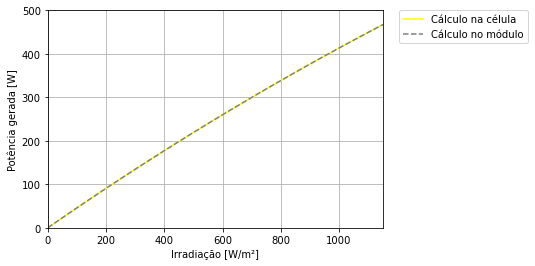

In [15]:
testeirradmodulo=[]
testeirradcelula=[]
testeirradGar=[intervalo for intervalo in np.arange(0,1220,20)]
testeirradthetaar=[0]*61
testeirradt=[12]*61
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradmodulo.append(analisemodulo(Gar,thetaar,t))
for Gar,thetaar,t, in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradcelula.append(analisecelula(Gar,thetaar,t))
plt.plot (testeirradGar,testeirradcelula,color = 'yellow', label='Cálculo na célula')
plt.plot (testeirradGar,testeirradmodulo,'--',color = 'grey', label='Cálculo no módulo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim (0,1150)
plt.ylim (0,500) 
plt.xlabel("Irradiação [W/m²]")
plt.ylabel("Potência gerada [W]")
plt.grid()
plt.savefig('resultadocomparacao1.png', dpi=600, bbox_inches='tight')
plt.show()

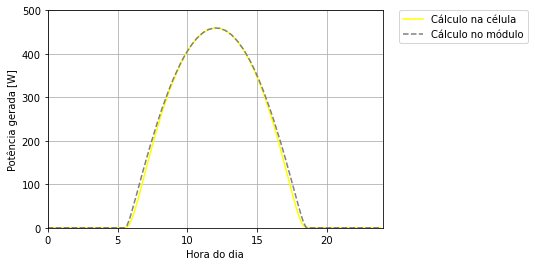

In [16]:
listat=[intervalo for intervalo in np.arange(0,24,(24/144))]
listatano=listat*365
testehorariomodulo=[]
testehorariocelula=[]
for Gar,thetaar,t in zip(matrizirradiacao[354], matrizanguloincidencia[354], listat):
    testehorariomodulo.append(analisemodulo(Gar,thetaar,t))
for Gar,thetaar,t in zip(matrizirradiacao[354], matrizanguloincidencia[354], listat):
    testehorariocelula.append(analisecelula(Gar,thetaar,t))

plt.plot (listat,testehorariocelula,color = 'yellow', label='Cálculo na célula')    
plt.plot (listat,testehorariomodulo,'--',color = 'grey', label='Cálculo no módulo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim (0,24)
plt.ylim (0,500) 
plt.xlabel("Hora do dia")
plt.ylabel("Potência gerada [W]")
plt.grid()
plt.savefig('resultadocomparacao3.png', dpi=600, bbox_inches='tight')
plt.show()

In [17]:
potenciamoduloNMOT=analisemodulo(800,0,12)
potenciacelulaNMOT=analisecelula(800,0,12)
erromoduloNMOT=(potenciamoduloNMOT-336)/potenciamoduloNMOT
errocelulaNMOT=(potenciacelulaNMOT-336)/potenciacelulaNMOT
print('Nas condições NMOT, o painel gera',"%.2f" % potenciamoduloNMOT,'W calculados, considerando o cálculo no módulo, um erro de',"%.2f" % (erromoduloNMOT*100),'%.')
print('Nas condições NMOT, o painel gera',"%.2f" % potenciacelulaNMOT,'W calculados, considerando o cálculo na célula, um erro de',"%.2f" % (errocelulaNMOT*100),'%.' )

Nas condições NMOT, o painel gera 338.44 W calculados, considerando o cálculo no módulo, um erro de 0.72 %.
Nas condições NMOT, o painel gera 338.44 W calculados, considerando o cálculo na célula, um erro de 0.72 %.


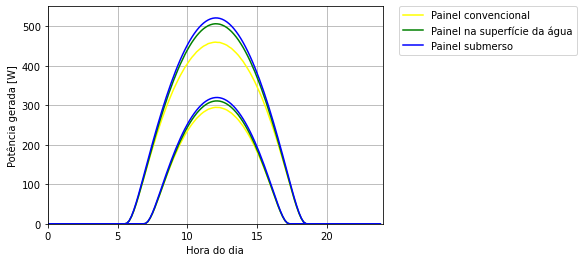

In [18]:
testehorariopadrao=[]
testehorariolinhaagua=[]
testehorariosubmerso=[]
testehorariopadraoinverno=[]
testehorariolinhaaguainverno=[]
testehorariosubmersoinverno=[]
for Gar,thetaar,t in zip(matrizirradiacao[354], matrizanguloincidencia[354], listat):
    testehorariopadrao.append(analisecelula(Gar,thetaar,t))
for Gar,thetaar,t in zip(matrizirradiacao[354], matrizanguloincidencia[354], listat):
    testehorariolinhaagua.append(analisemisto(Gar,thetaar,t))
for Gar,thetaar,t in zip(matrizirradiacao[354], matrizanguloincidencia[354], listat):
    testehorariosubmerso.append(analiseagua(Gar,thetaar,t))    
for Gar,thetaar,t in zip(matrizirradiacao[172], matrizanguloincidencia[172], listat):
    testehorariopadraoinverno.append(analisecelula(Gar,thetaar,t))
for Gar,thetaar,t in zip(matrizirradiacao[172], matrizanguloincidencia[172], listat):
    testehorariolinhaaguainverno.append(analisemisto(Gar,thetaar,t))
for Gar,thetaar,t in zip(matrizirradiacao[172], matrizanguloincidencia[172], listat):
    testehorariosubmersoinverno.append(analiseagua(Gar,thetaar,t))    
plt.plot (listat,testehorariopadrao,color = 'yellow', label='Painel convencional')
plt.plot (listat,testehorariolinhaagua,color = 'green', label='Painel na superfície da água')
plt.plot (listat,testehorariosubmerso,color = 'blue', label='Painel submerso')
plt.plot (listat,testehorariopadraoinverno,color = 'yellow')
plt.plot (listat,testehorariolinhaaguainverno,color = 'green')
plt.plot (listat,testehorariosubmersoinverno,color = 'blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim (0,24)
plt.ylim (0,550) 
plt.xlabel("Hora do dia")
plt.ylabel("Potência gerada [W]")
plt.grid()
plt.savefig('testeirrad4.png', dpi=600, bbox_inches='tight')
plt.show()

In [19]:
print('Durante o solstício de verão, o painel na superfície da água gerou',"%.2f" % ((100*sum(testehorariolinhaagua)/sum(testehorariopadrao))-100),'% mais energia que o painel convencional')
print('Durante o solstício de verão, o painel submerso gerou',"%.2f" % ((100*sum(testehorariosubmerso)/sum(testehorariopadrao))-100),'% mais energia que o painel convencional')
print('Durante o solstício de inverno, o painel na superfície da água gerou',"%.2f" % ((100*sum(testehorariolinhaaguainverno)/sum(testehorariopadraoinverno))-100),'% mais energia que o painel convencional')
print('Durante o solstício de inverno, o painel submerso gerou',"%.2f" % ((100*sum(testehorariosubmersoinverno)/sum(testehorariopadraoinverno))-100),'% mais energia que o painel convencional')

Durante o solstício de verão, o painel na superfície da água gerou 7.56 % mais energia que o painel convencional
Durante o solstício de verão, o painel submerso gerou 10.86 % mais energia que o painel convencional
Durante o solstício de inverno, o painel na superfície da água gerou 4.08 % mais energia que o painel convencional
Durante o solstício de inverno, o painel submerso gerou 7.44 % mais energia que o painel convencional


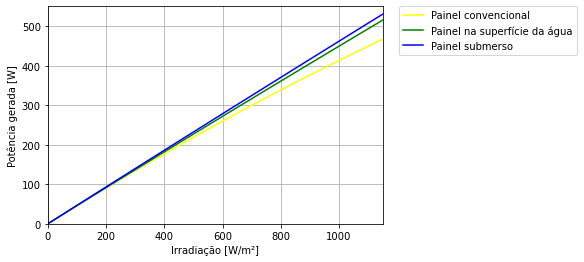

In [20]:
testeirradpadrao=[]
testeirradlinhaagua=[]
testeirradsubmerso=[]
testeirradGar=[intervalo for intervalo in np.arange(0,1220,20)]
testeirradthetaar=[0]*61
testeirradt=[12]*61
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradpadrao.append(analisecelula(Gar,thetaar,t))
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradlinhaagua.append(analisemisto(Gar,thetaar,t))
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradsubmerso.append(analiseagua(Gar,thetaar,t))   
plt.plot (testeirradGar,testeirradpadrao,color = 'yellow', label='Painel convencional')
plt.plot (testeirradGar,testeirradlinhaagua,color = 'green', label='Painel na superfície da água')
plt.plot (testeirradGar,testeirradsubmerso,color = 'blue', label='Painel submerso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim (0,1150)
plt.ylim (0,550) 
plt.xlabel("Irradiação [W/m²]")
plt.ylabel("Potência gerada [W]")
plt.grid()
plt.savefig('testepot.png', dpi=600, bbox_inches='tight')
plt.show()

In [21]:
energiadiacelula=[]
for Gar,thetaar,t in zip(irraddia, angulo, listatano):
    energiadiacelula.append(analisecelula(Gar,thetaar,t))
matrizenergiacelula=np.array_split(energiadiacelula, 365)
energiadiamisto=[]
for Gar,thetaar,t in zip(irraddia, angulo, listatano):
    energiadiamisto.append(analisemisto(Gar,thetaar,t))
matrizenergiamisto=np.array_split(energiadiamisto, 365)
energiadiaagua=[]
for Gar,thetaar,t in zip(irraddia, angulo, listatano):
    energiadiaagua.append(analiseagua(Gar,thetaar,t))
matrizenergiaagua=np.array_split(energiadiaagua, 365)
print('Durante o ano, o painel na superfície da água gerou',"%.2f" % ((100*sum(energiadiamisto)/sum(energiadiacelula))-100),'% mais energia que o painel convencional')
print('Durante o ano, o painel submerso gerou',"%.2f" % ((100*sum(energiadiaagua)/sum(energiadiacelula))-100),'% mais energia que o painel convencional')

Durante o ano, o painel na superfície da água gerou 6.43 % mais energia que o painel convencional
Durante o ano, o painel submerso gerou 9.70 % mais energia que o painel convencional


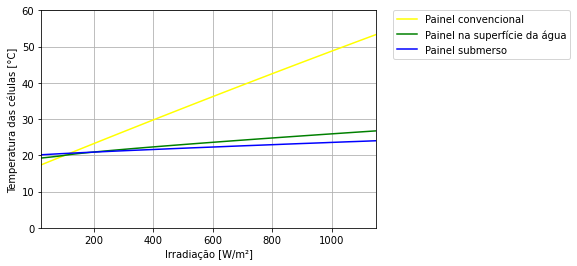

In [26]:
# Atenção: para este gráfico, trocar "return Energiagerada" nas funções por "return Tcentrocelula"
testeirradpadrao=[]
testeirradlinhaagua=[]
testeirradsubmerso=[]
testeirradGar=[intervalo for intervalo in np.arange(0,1220,20)]
testeirradthetaar=[0]*61
testeirradt=[12]*61
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradpadrao.append(analisecelula(Gar,thetaar,t)-273.15)
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradlinhaagua.append(analisemisto(Gar,thetaar,t)-273.15)
for Gar,thetaar,t in zip(testeirradGar, testeirradthetaar, testeirradt):
    testeirradsubmerso.append(analiseagua(Gar,thetaar,t)-273.15)   
plt.plot (testeirradGar,testeirradpadrao,color = 'yellow', label='Painel convencional')
plt.plot (testeirradGar,testeirradlinhaagua,color = 'green', label='Painel na superfície da água')
plt.plot (testeirradGar,testeirradsubmerso,color = 'blue', label='Painel submerso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim (25,1150)
plt.ylim (0,60) 
plt.xlabel("Irradiação [W/m²]")
plt.ylabel("Temperatura das células [°C]")
plt.grid()
plt.savefig('testetemp.png', dpi=600, bbox_inches='tight')
plt.show()

In [27]:
print('A temperatura do módulo nas condições NMOT é',"%.2f" % (analisemodulo(800,0,12)-273.15),'°C')
print('A temperatura do módulo nas condições NMOT calculando a geração na célula é',"%.2f" % (analisecelula(800,0,12)-273.15),'°C')

A temperatura do módulo nas condições NMOT é 42.51 °C
A temperatura do módulo nas condições NMOT calculando a geração na célula é 42.51 °C
